# Nuvens de palavras
Este notebook é parte da documentação de uma exploração de dados realizada para o artigo _**O uso da Cloroquina no tratamento da Covid-19 debatido no Facebook**: um estudo em opinião pública com processamento de linguagem natural_.

## Importando e lendo os dados
A intenção inicial era que os dados fossem puxados diretamente de um [pandas dataframe](https://pandas.pydata.org/), mas o programa pegou apenas os primeiros caracteres da coluna de conteúdo da planilha, então foi necessário usar uma solução mais "feia": arquivos CSV apenas com esse conteúdo, que pode ser convertido em dataframes posteriormente (caso necessário).

In [1]:
# montando o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Caminho dos arquivos no meu Drive
!ls '/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo'

content1.csv  content3.csv  content5.csv  content7.csv
content2.csv  content4.csv  content6.csv


In [3]:
# Abrindo todos os sete datasets
data1 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content1.csv')
data1 = data1.read()

data2 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content2.csv')
data2 = data2.read()

data3 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content3.csv')
data3 = data3.read()

data4 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content4.csv')
data4 = data4.read()

data5 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content5.csv')
data5 = data5.read()

data6 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content6.csv')
data6 = data6.read()

data7 = open('/content/drive/My Drive/Acadêmico/~COMU 7007/~Artigo/dataframes/CSV/conteúdo/content7.csv')
data7 = data7.read()

data1
data2
data3
data4
data5
data6
data7

'Ta com medinho agora ja ferrou com muota gente não adianta mais\nEle é uma vergonha sem precedentes\nvergonha é ser roubado.\ntambém! Lula na cadeia e Bolsonaro num manicômio\nNão é vergonha . O mais certo é a recomendação dos médicos mesmo lá fora barrando os remédios\nmesmo com todo apoio médio tá passando mal com a bosta da cloroquina kkkkkkkkkkkkkkkkkkkkkkkkkk\nOlha presidente com muitas pessoas deu certo a cloroquina não esquenta gente inútil enche o saco mesmo\nfonte: cabecinha perturbada\na sua só se for\nFontes: “vozes da minha cabeça” nem sempre tão lúcida.\namei vc !!!!\nOu é fake ou essa criatura é louco.\nEle n eh médico kkkk ...tá certo ele ueh !!!\nO povo meficre meu Deus não tem o que fazer\nEle tomou, minutos famosos tomaram, conheço muita gente q tomou. ELE É A FAVOR DO USO. QUEM RECOMENDA É O MÉDICO.\nVcs tem cérebro?\nNão recomenda mais a cloroquina. Nenhuma descrição de foto disponível.\nClaro que não, ele não é médico  🤷\u200d♂️ quem prescreve é o médico. Só disto

## TextBlob
Antes de montar a Wordcloud, precisamos fazer os dados serem lidos pelo [TextBlob](https://textblob.readthedocs.io/en/dev/).

In [4]:
# importando biblioteca e criando TextBlobs para cada dataset
from textblob import TextBlob
blob1 = TextBlob(data1)
blob2 = TextBlob(data2)
blob3 = TextBlob(data3)
blob4 = TextBlob(data4)
blob5 = TextBlob(data5)
blob6 = TextBlob(data6)
blob7 = TextBlob(data7)

Agora sim, podemos gerar a nuvem de palavras. É preciso importar o [pyplot](https://matplotlib.org/api/pyplot_api.html) do [MatPlotLib](https://matplotlib.org/), que é uma biblioteca do Python para plotar gráficos de vários tipos. PIL é a [Python Image Library](http://www.pythonware.com/products/pil/), usada também no tratamento de imagens. A [Wordcloud](https://amueller.github.io/word_cloud/) lida especificamente com as configurações da visualização.

As nuvens geradas abaixo ainda não foram limpas: dá pra ver pela presença dos verbos de ligação, preposições, artigos etc; elas são todas mais ou menos iguais pela repetição desses termos. É uma fase importante do processo, então vale deixar aqui por extenso. [Aqui](https://www.datacamp.com/community/tutorials/wordcloud-python) tem um tutorial de nuvem bem completinho para referência.

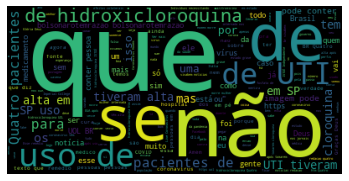

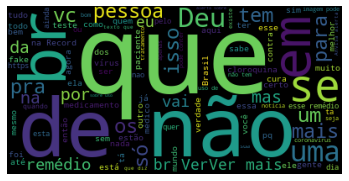

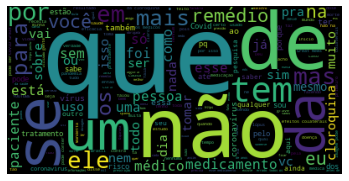

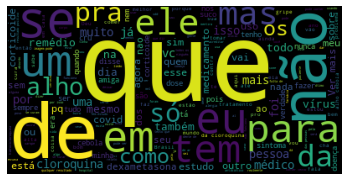

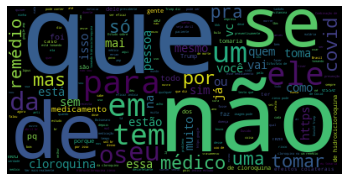

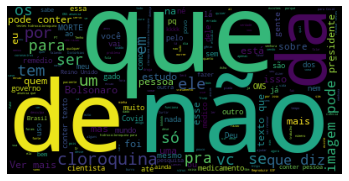

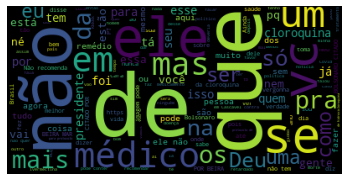

In [5]:
# importando bibliotecas
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

# testando e plotando as nuvens
wordcloud1 = WordCloud().generate(data1)
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

wordcloud2 = WordCloud().generate(data2)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

wordcloud3 = WordCloud().generate(data3)
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

wordcloud4 = WordCloud().generate(data4)
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

wordcloud5 = WordCloud().generate(data5)
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

wordcloud6 = WordCloud().generate(data6)
plt.imshow(wordcloud6)
plt.axis("off")
plt.show()

wordcloud7 = WordCloud().generate(data7)
plt.imshow(wordcloud7)
plt.axis("off")
plt.show()

## Tokenização
Os tokens são os blocos constituintes do texto, as palavras. Do ponto de vista do computador, uma linha de texto é um conjunto sucessivo de caracteres, incluindo espaços. Precisamos fazer com que esse texto seja compreensível para a nossa análise automatizada, e tokenizá-lo é essencial para isso.

Para fazer esse processo, precisaremos criar uma lista com as palavras usadas no conteúdo, colocá-las em caixa baixa e remover os links do meio do texto. Daremos um jeito de guardar esses links porque podem ser úteis mais adiante.

In [6]:
links = []

# essa função gera uma lista com todas as palavras de cada thread e armazena os links encontrados no array "links"
def tokeniz(data):
  blob = TextBlob(data)
  palavras = blob.words.lower()

  j = 0
  for i in palavras:
    j = j + 1
    if i == "https":
      links.append(palavras[j])
      palavras.pop(j)

  return palavras

## Stopwords
Agora vamos limpar o texto das palavras vazias. Com a ajuda do [NLTK](http://www.nltk.org/) conseguimos fazer algumas coisas, como por exemplo essa lista geralzona de stopwords em português.

In [7]:
# importando bibliotecas
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')            # isso aqui lida com sinais de pontuação

print(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'est

# Wordclouds
Agora, acrescentamos à lista de stopwords do NLTK uma lista personalizada baseada na observação do nosso conjunto de dados, configuramos a aparência da nuvem e geramos sua imagem em seguida.

Coloquei as stopwords personalizadas de todas os conjuntos de dados em uma única variável, com o criativo nome de _stop_. Não achei um modo melhor de plotar as nuvens além de fazer um bloco de código para cada uma.

In [8]:
# criando a lista para a nuvem a partir da tokenização
stop = ['a1-tomando-hidroxicloroquina/a-53490069', 'maca=pt-br-facebook-sharing', '…ver', '21.05.2020', 'el', 'la', '1a', 'id=111037913835511', 'story_fbid=142404497365519', 'angu…ver', 'cartacapital.com.br', '83', '0:08', '‎‎9', 'rfi', '2:15', '‎11:13', 'مه', '79', 'dp', '6:20', '0:29', '05/06/2020', 'A1rmaco-contra-la-malaria-para-combatir-el-coronavirus/a-53525047', '28x', '55', 'pessoa…ver', 'salvado…ver', 'rebanho…ver', 'revistagalileu.globo.com', '22:45', '000', '2comentários', '2:33', '5x', '×', 'messeng…ver', '23:19', 'usoalideatdatr.coacmacegamos', 'rob…ver', 'derivados.…ver', '35.000', 'nã…ver', 'n', '1,5', 'cr', '90.000', '19', 'td', 'veja.abril.com.br', '90', 'not', '7:12', '20_05_2020', 'consultaremedios.com.br', 'id=636938300054720', 'story_fbid=1019342698480943', 'b', '25a3o-de-casos-de-covid-19-1.424102', '25ADcias/geral/eua-passa-de-90-000-mortes-e-1-5-milh%25C3%25A3o-de-casos-de-covid-19-1.424102%3famp=1', 'correiodopovo.com.br', 'ciencia.estadao.com.br', 'utm_medium=link', '3afacebook', '30', '6', 'utm_source=estadao', 'it', 'id=100003639170871', 'story_fbid=1870871703044117', 'http://www.gazetadopovo.com.br/republica/breves/coronavirus-sociedade-brasileira-imunologia-cloroquina', 'gazetadopovo.com.br', 'dailymail.co.uk', '1…ver', '14', '508', 'w', '400', 'c3', 'v=uijcuwvardy', 'entã…ver', '16', '96000', 'https://www.medrxiv.org/content/10.1101/2020.04.07.20056424v2', 'feature=youtu.be', 'v=vmdyiiidml8', '68', '08', 'media1.tenor.co', 'necessit…ver', 'giphy', 'es', 'unicamp.br', 't', 'id=100000982583520', 'story_fbid=3937748652934515', 'www1.folha.uol.com.br', 'correiobraziliense.com.br', 'maca=pt-br-facebook-sharing', '12:53', '94', '99', 'l…ver', 'lamarque/reuters', '1.000', 'd3', 'g1.globo.com', 'a1-tomando-hidroxicloroquina/a-53490069', '70', '01:29', '01:30', '8', 'n', '11', 'fbclid=IwAR00ntGTutiH3TOgQA18xBFpHmMnMKQ4CeGORpPYRwnYqe4-z-7sBACkS4w', 'v=imyfz7ri8vc', 'v=zer6omw0vnu', '2002', 'v=wa2om70v66o', 'x', 'ufpr.br', '11.°', '14', 'luciliadiniz.com', '11:56', '348', '428', 'ea', '15', 'médicosrevistacrescer.globo.com', 'pel…', 'saude.estadao.com.br', 'qq', 'di…ver', 'di…ver', 'vi…ver', '67', 'infart…ver', 'acredita…ver	', 'q…ver', 'a…ver', 'chat.whatsapp.com', '500mg', '450', '90', '200mg', 'e…ver', '30', 'n9', 'ñ', 'c', 'tb', '30', 'i', '07/04', '24', 'and', 'so', '’', '‘', '500', 'at', 'id=100031212156711', 'story_fbid=241150380268699', '03', '13/03/2020', '2/2', '25876', '01441', '2000', '5.000', 'the', '23:11', 'www.google.com', '21:35', 'ii', 'mg/kg', 'qd', '’', 'so', 'c', 'est', '»', 'noticias.r7.com', 'he', '19', 'www1.folha.uol.com.br', '23:22', '24', 'bloomberg.com', 'co…', 'google.com', 'to', 'is', 'it', 'oh', '川', '5:27', 'neh', 'brasil.elpais.com	', 'afff', '3foutputtype=amp', '36', '90', '400', 'c', '🥱', 'tô', 'mi', 'rs', 'correiobraziliense.com.br', 'r', 'agr', 'ô', '819', 'pre', '19', 'uai', '14', 'so', 'twitch.tv', '13', '2003', 'afz', 'hein', '35', 'media1.tenor.co', 'á', 'giphy', 'g1.globo.com', 'b382022', '2,5', '18.000.00', 'epoca.globo.com', 'veja.abril.com.br', 'id=100002238746462', 'story_fbid=3034985226586072', 'ê', 'o', 'aff', '39', '16', 'brakkkkkkkkkkkk', 'k', 'afffff', '8', '5,3', '15', '7.599', '3.120', 'gb', '64', '11', '16,5', '400', 'n', '18', 'ueh', '900', 'amp=1', '2o', 'bvsms.saude.gov.br/bvs/sus/comissoes.php', 'bvsms.saude.gov.br', 'http', 'usg=aovvaw2rb7swa3zpjklxt9uikurm', 'ved=2ahukewjslo6_7nlqahxvqd8khyh1dz0qfjahegqibrac', 'url=https', 'url=https', 'rct=j', 'source=web', 'sa=t', 'g', '25', 'नपूण‎', 'د', 'https://www.correiobraziliense.com.br/app/noticia/politica/2020/07/16/interna_politica,872688/amp.htm', 'muita', 'q', '2', '1', 'uol.com.br', 'om', 'apenas', 'antes', 'olha', 'assim', 'todo', 'twitch', 'pro', 'qualquer', 'gif', 'tenor', 'imagem', 'coisa', 'quanto', 'outros', 'algum', 'outra', 'ja', 'ainda', 'lá', 'vou', 'tão', 'falou', 'devem', 'podem', 'sinoussi', 'barré', 'françoise', 'tá', 'têm', 'pode', 'após', 'https', 'pois', 'uol', 'istoé', 'vai', 'toda', 'tudo', 'sim', 'bolsonarotemrazao', 'outro', 'onde', 'vez', 'pós', 'ter', 'vem', 'vão', 'google amp', 'né', 'tiraram', 'noticias', 'r7', 'eh', 'disse', 'algo', 'então', 'desse', 'dizer', 'quê', 'sendo', 'tbm', 'pra', 'aí', 'dessa', 'deve', 'sob', 'br', 'dar', 'dá', 'etc', 'ai', 'imagem pode', 'conter', 'cada', 'deu', 'vc', 'nao', 'aponta', 'pq', 'sobre', 'quer', 'ta', 'deixa', 'iwar0geexfnu6ezovclpbvw5x3z3yon5n1x6sido5p7ezuom_uwouu31rboay', 'fbclid=iwar2srohpl8geeqr8a9zyz17hpgmms4hh1q87ffficm_ek0v9srs5lgqsn68', '“', '”', 'p', '-', '…', '3', 'm', 'oglobo.globo.com', '10', '75', 'x', 'youtube.com', '20/03', '25/03', '26/03/2020', 's', '40', '60', '—', '460.361', '100', '100.000', 'istoe.com.br', '5', 'oq', '1.527.536', '122.025.818', '6.206.514', '1.152.283', '187.799.806', '627.047', '120.836.850', '831.381', '3.496.359', 'imperial.ac.uk', '1,6', '212.559.409', 'f', '529.779', '15.432', '72.398', '57.423', 'otempo.com.br', '206.087', '49.599.016', '4', '702.497', '250.182', '44.212', '11.457.197', '97.044', 'e/ou', 'noticias.uol.com.br', 'gizmodo.uol.com.br', '1.182.457', '0,2', '7', '니', 'usp=drivesdk', 'drive.google.com', '80', '20', 'clo2', '14x', '0:02', '0:00', 'ப', 'h', '4e', 'cmpid=copiaecola', '18:46', 'd', '27/03', '12h', 'av', 'ah', '²', '12', 'covidvisualizer.com', '17:30', '1,2kb/s', '19:34', 'è', '口', '444', 'u', '24/03/20', '08h38', '520', '09:50']
cloud1 = ''
cloud2 = ''
cloud3 = ''
cloud4 = ''
cloud5 = ''
cloud6 = ''
cloud7 = ''

# compilando o material das nuvens
for i in tokeniz(data1): cloud1 = cloud1 + i + " "
for j in tokeniz(data2): cloud2 = cloud2 + j + " "
for k in tokeniz(data3): cloud3 = cloud3 + k + " "
for l in tokeniz(data4): cloud4 = cloud4 + l + " "
for m in tokeniz(data5): cloud5 = cloud5 + m + " "
for n in tokeniz(data6): cloud6 = cloud6 + n + " "
for o in tokeniz(data7): cloud7 = cloud7 + o + " "

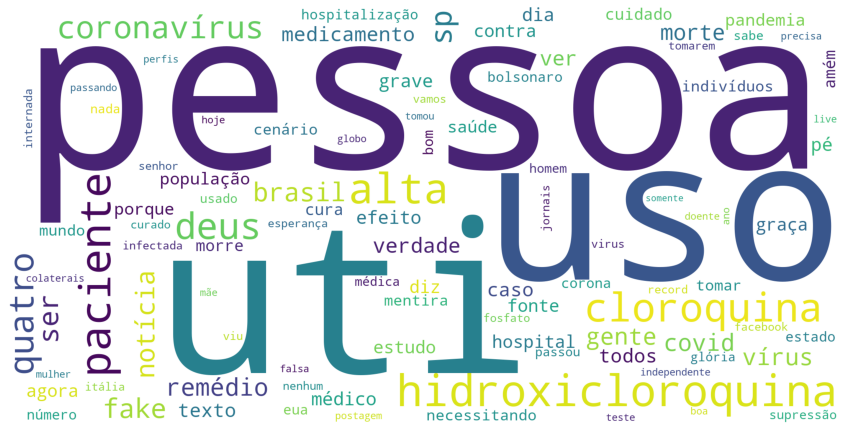

In [9]:
# plotando a nuvem 1
wordcloud1 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud1)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

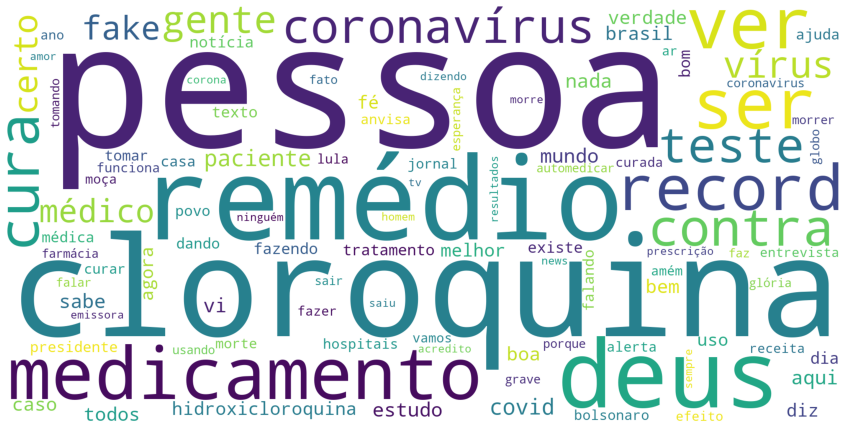

In [10]:
# plotando a nuvem 2
wordcloud2 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud2)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

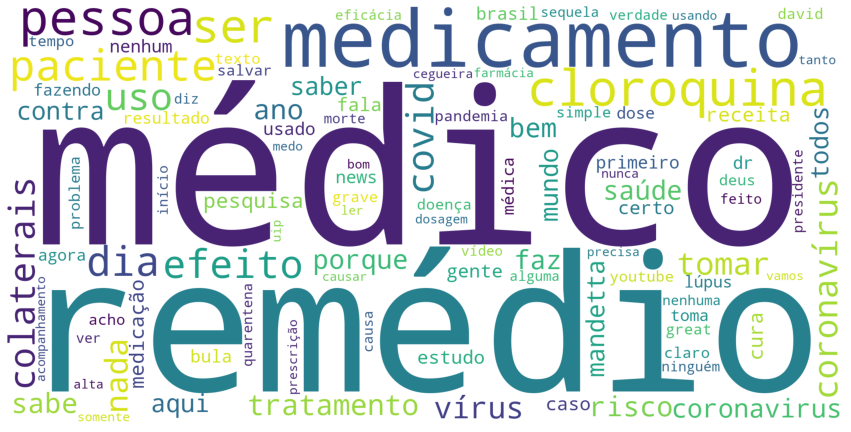

In [11]:
# plotando a nuvem 3
wordcloud3 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud3)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

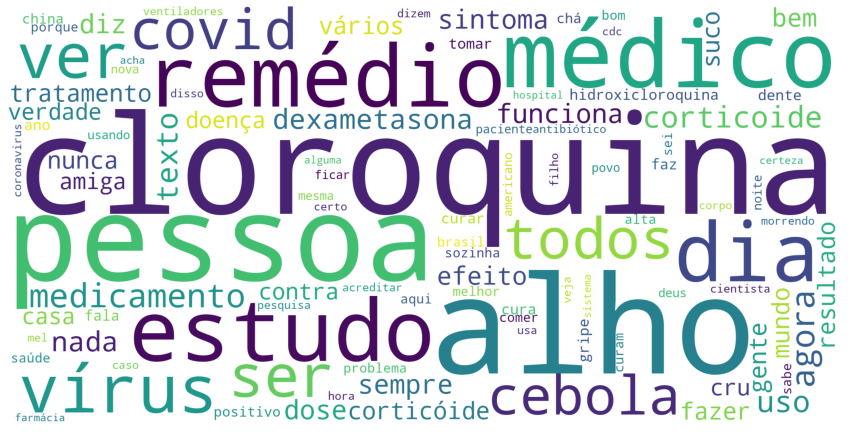

In [12]:
# plotando a nuvem 4
wordcloud4 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud4)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

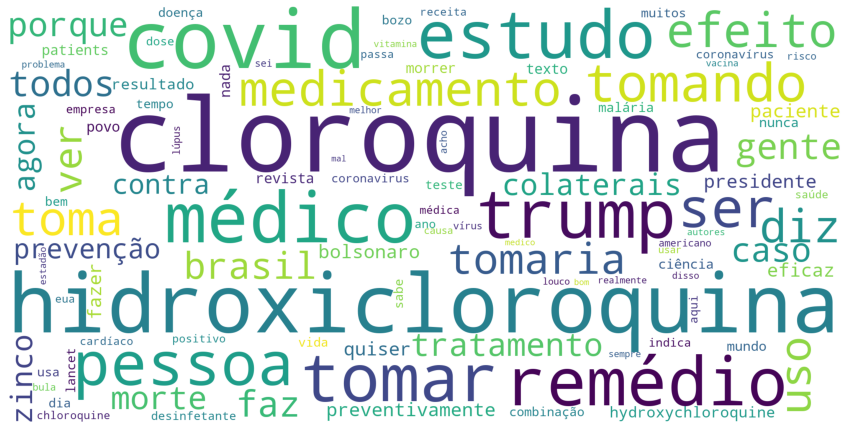

In [13]:
# plotando a nuvem 5
wordcloud5 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud5)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

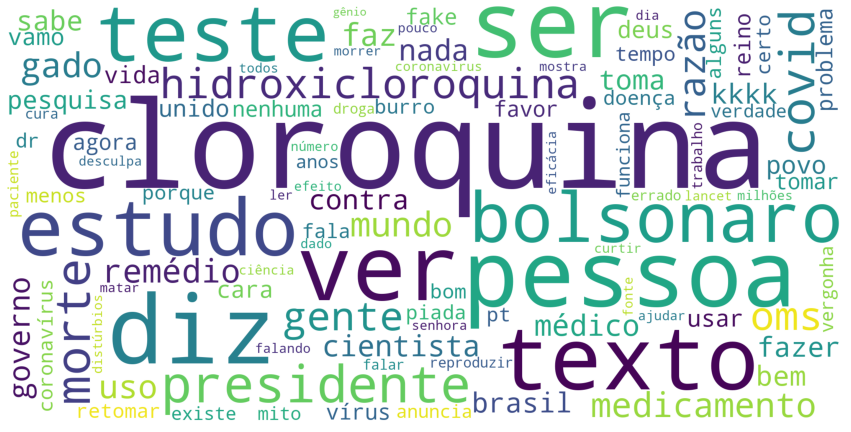

In [14]:
# plotando a nuvem 6
wordcloud6 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud6)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud6)
plt.axis("off")
plt.show()

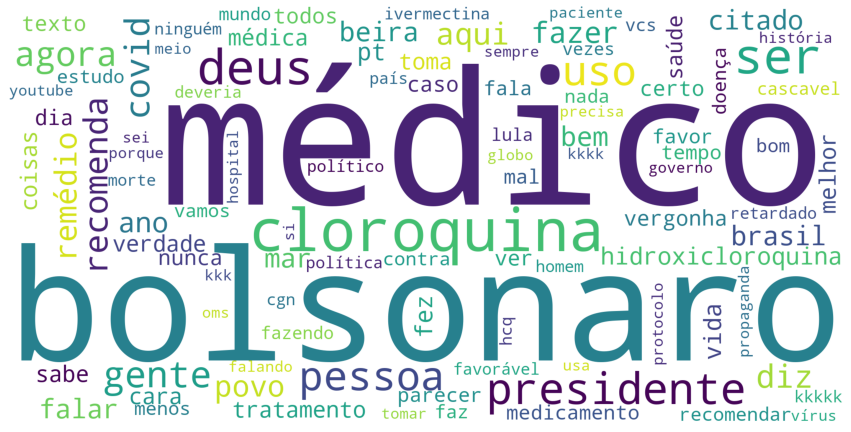

In [15]:
# plotando a nuvem 7
wordcloud7 = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1000,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(cloud7)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud7)
plt.axis("off")
plt.show()

# Nuvenzona
Pra fechar esse pedaço, uma única nuvem de palavras com material de todas essas threads. Em cada thread individual deu pra ver os temas que dominam cada discussão; uma delas, inclusive, tem grande presença das palavras "alho" e "cebola" porque os usuários ficaram trocando receitas que supostamente aumentam a imunidade nos comentários. Quem sabe assim conseguimos captar um espírito geral que tenha contaminado essa gente toda.

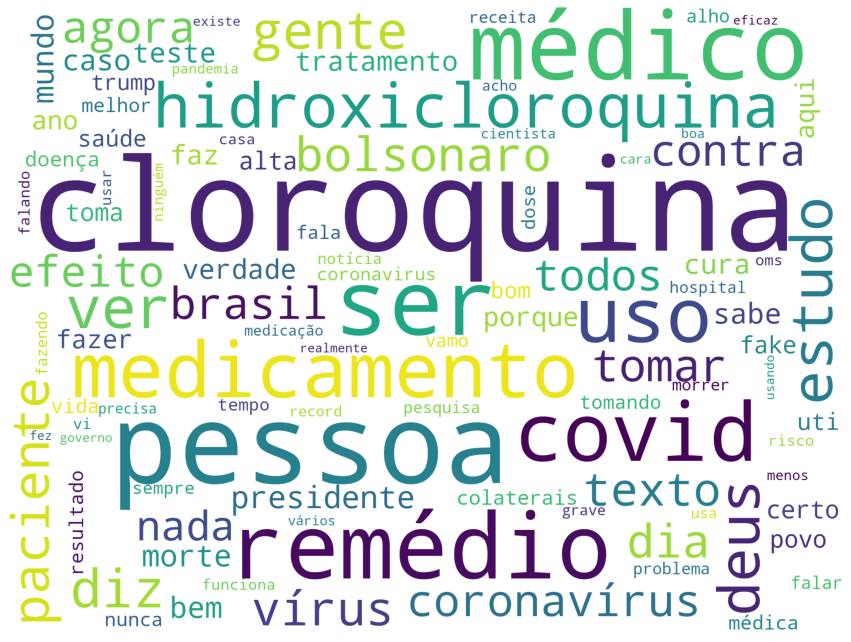

In [16]:
# a criatividade com nomes de variáveis é uma coisa incrível
claudia = cloud1 + cloud2 + cloud3 + cloud4 + cloud5 + cloud6 + cloud7

# plotando a nuvenzona
wordcloudona = WordCloud(
    stopwords = list(STOPWORDS) + stopwords.words('portuguese') + stop,
    background_color = 'white',
    height = 1500,
    width = 2000,
    relative_scaling = 0.7,
    max_words = 100,
    collocations = False, # isso separa n-gramas
    random_state = 1
    ).generate(claudia)

plt.figure(figsize=(15,15))
plt.imshow(wordcloudona)
plt.axis("off")
plt.show()